In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


install libraries

In [ ]:
!pip install pydiogment
!pip install -U pydiogment

In [3]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='wav/aman/Recording (2)-converted.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

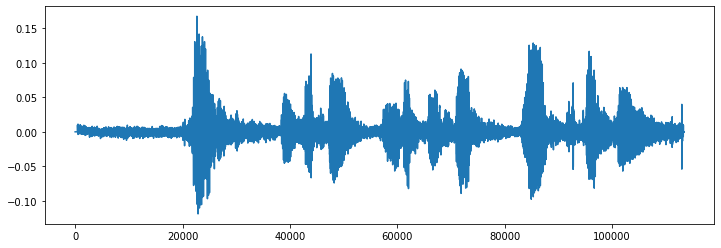

In [4]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

# Insert dataset

In [9]:

import pandas as pd
import os
import librosa

audio_dataset_path='wav/dataset/akash/'
metadata=pd.read_excel('wav/dataset/akash/akash_new.xlsx')
metadata.head()


,file_name,class
0,WhatsApp Audio 2021-06-09 at 7.03.07 PM.wav,akash
1,WhatsApp Audio 2021-06-09 at 7.03.07 PM (1).wav,akash
2,WhatsApp Audio 2021-06-09 at 7.03.06 PM.wav,akash
3,WhatsApp Audio 2021-06-09 at 7.03.06 PM (2).wav,akash
4,WhatsApp Audio 2021-06-09 at 7.03.06 PM (1).wav,akash


In [7]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

#### Extracting MFCC's For every audio file

In [10]:


import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
#extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),str(row["file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])



800it [02:59,  4.46it/s]


In [11]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-371.93112, 145.489, -22.60909, 18.450535, 40...",aman
1,"[-430.44672, 200.24297, -58.688416, 23.587633,...",aman
2,"[-447.62125, 208.67944, -55.273323, 18.741728,...",aman
3,"[-426.615, 201.91743, -52.755993, 23.815062, 4...",aman
4,"[-449.78067, 202.17969, -55.067146, 20.718473,...",aman


In [12]:
extracted_features_df.tail()

,feature,class
1547,"[-392.98712, 157.27275, -25.600758, 14.179449,...",akash
1548,"[-382.30505, 161.24277, -35.295837, 7.4671283,...",akash
1549,"[-411.27338, 153.2634, -21.0966, 13.288947, 40...",akash
1550,"[-415.59647, 154.93677, -23.800282, 16.818874,...",akash
1551,"[-406.82013, 154.63939, -25.195005, 15.650413,...",akash


### Split the dataset into independent and dependent dataset

In [13]:

X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [14]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

## Applying SGDClassifier

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier


lr_clf = SGDClassifier(early_stopping=True,eta0=.0001,max_iter=2,random_state=22)
lr_clf.fit(X_train, y_train)


print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 94.44%
_______________________________________________
CLASSIFICATION REPORT:
                akash        aman  accuracy    macro avg  weighted avg
precision    0.991424    0.902736    0.9444     0.947080      0.948616
recall       0.900312    0.991653    0.9444     0.945982      0.944400
f1-score     0.943673    0.945107    0.9444     0.944390      0.944366
support    642.000000  599.000000    0.9444  1241.000000   1241.000000
_______________________________________________
Confusion Matrix: 
 [[578  64]
 [  5 594]]

Test Result:
Accuracy Score: 95.18%
_______________________________________________
CLASSIFICATION REPORT:
                akash        aman  accuracy   macro avg  weighted avg
precision    1.000000    0.910714  0.951768    0.955357      0.956075
recall       0.905063    1.000000  0.951768    0.952532      0.951768
f1-score     0.950166    0.953271  0.951768    0.951719      0.951694
support    158.000000  153.000000  0.951768  311.000000   

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


## Applying SVC

In [23]:
from sklearn.svm import SVC


svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0,random_state=32,)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
           akash   aman  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    642.0  599.0       1.0     1241.0        1241.0
_______________________________________________
Confusion Matrix: 
 [[642   0]
 [  0 599]]

Test Result:
Accuracy Score: 71.38%
_______________________________________________
CLASSIFICATION REPORT:
                akash        aman  accuracy   macro avg  weighted avg
precision    0.639676    1.000000  0.713826    0.819838      0.816942
recall       1.000000    0.418301  0.713826    0.709150      0.713826
f1-score     0.780247    0.589862  0.713826    0.685054      0.686585
support    158.000000  153.000000  0.713826  311.000000    311.000000
_______________________________________________

## Applying RandomForestClassifier

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1, random_state=42,max_depth=1)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 97.66%
_______________________________________________
CLASSIFICATION REPORT:
                akash        aman  accuracy    macro avg  weighted avg
precision    0.975194    0.978188  0.976632     0.976691      0.976639
recall       0.979751    0.973289  0.976632     0.976520      0.976632
f1-score     0.977467    0.975732  0.976632     0.976600      0.976630
support    642.000000  599.000000  0.976632  1241.000000   1241.000000
_______________________________________________
Confusion Matrix: 
 [[629  13]
 [ 16 583]]

Test Result:
Accuracy Score: 97.43%
_______________________________________________
CLASSIFICATION REPORT:
                akash        aman  accuracy   macro avg  weighted avg
precision    0.962963    0.986577  0.974277    0.974770      0.974580
recall       0.987342    0.960784  0.974277    0.974063      0.974277
f1-score     0.975000    0.973510  0.974277    0.974255      0.974267
support    158.000000  153.000000  0.974277  311.000000   

In [27]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["SGDClassifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,SGDClassifier,94.439968,95.176849


In [28]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,SGDClassifier,94.439968,95.176849
1,Support Vector Machine,100.000000,71.382637


In [29]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,SGDClassifier,94.439968,95.176849
1,Support Vector Machine,100.000000,71.382637
2,Random Forest Classifier,97.663175,97.427653


## Applying Deep Neural Network

In [30]:


### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))



In [31]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [33]:
### No of classes
num_labels=y.shape[1]

In [34]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [35]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4100      
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               2

In [36]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [37]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs =35
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/35
39/39 [==============================] - 1s 9ms/step - loss: 28.7150 - accuracy: 0.4875 - val_loss: 0.7871 - val_accuracy: 0.5563

Epoch 00001: val_loss improved from inf to 0.78709, saving model to saved_models/audio_classification.hdf5
Epoch 2/35
39/39 [==============================] - 0s 4ms/step - loss: 11.6600 - accuracy: 0.5101 - val_loss: 0.8476 - val_accuracy: 0.4662

Epoch 00002: val_loss did not improve from 0.78709
Epoch 3/35
39/39 [==============================] - 0s 4ms/step - loss: 6.0775 - accuracy: 0.5665 - val_loss: 0.6558 - val_accuracy: 0.5659

Epoch 00003: val_loss improved from 0.78709 to 0.65581, saving model to saved_models/audio_classification.hdf5
Epoch 4/35
39/39 [==============================] - 0s 4ms/step - loss: 4.2053 - accuracy: 0.5641 - val_loss: 0.7315 - val_accuracy: 0.4984

Epoch 00004: val_loss did not improve from 0.65581
Epoch 5/35
39/39 [==============================] - 0s 4ms/step - loss: 3.0591 - accuracy: 0.5600 - val_loss: 0.72

In [38]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

1.0


In [39]:
filename="wav/dataset/aman/Recording (8)-converted.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict_classes(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[-3.7193112e+02  1.4548900e+02 -2.2609091e+01  1.8450535e+01
  4.0960831e+01 -1.3742833e+01 -4.1063385e+00  1.3415975e+01
 -1.1484894e+01 -9.9901972e+00  2.7550001e-02 -6.6313305e+00
  1.4648305e+00  5.1530714e+00 -4.5525694e+00 -9.8004907e-01
  4.4885907e-01 -6.1117506e+00 -2.1256275e+00 -7.2516806e-02
 -2.2938883e+00  3.0043283e+00  3.1290119e+00 -8.7787354e-01
  2.6505778e+00  3.3047986e+00  1.1026218e+00  3.1278136e+00
  6.6897023e-01 -2.5826888e+00  1.2943597e+00  2.6464984e+00
  5.1432317e-01  1.3826212e+00  1.0832032e+00 -2.0555533e-01
  7.5960594e-01  3.9840186e-01 -7.1845204e-01 -4.8347920e-01]
[[-3.7193112e+02  1.4548900e+02 -2.2609091e+01  1.8450535e+01
   4.0960831e+01 -1.3742833e+01 -4.1063385e+00  1.3415975e+01
  -1.1484894e+01 -9.9901972e+00  2.7550001e-02 -6.6313305e+00
   1.4648305e+00  5.1530714e+00 -4.5525694e+00 -9.8004907e-01
   4.4885907e-01 -6.1117506e+00 -2.1256275e+00 -7.2516806e-02
  -2.2938883e+00  3.0043283e+00  3.1290119e+00 -8.7787354e-01
   2.6505778e+00 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array(['aman'], dtype='<U5')

In [ ]:
import speech_recognition as sr
filename = 'wav/Recording (2)conv.wav'
r = sr.Recognizer()
# open the file
with sr.AudioFile(filename) as source:
    # listen for the data (load audio to memory)
    audio_data = r.record(source)
    # recognize (convert from speech to text)
    text = r.recognize_google(audio_data)
    print(text)

### Output- please open the door